## Bihar Heritage Analytics

#### This project explores the rich cultural and historical heritage of Bihar using data analysis.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load dataset

In [2]:
df = pd.read_csv("bihar_heritage_full.csv")
print(df.head())

                     Site    Type   District Year_Built UNESCO  \
0        Mahabodhi Temple  Temple       Gaya       -200    Yes   
1      Nalanda University   Ruins    Nalanda        500    Yes   
2  Vikramshila University   Ruins  Bhagalpur        800     No   
3           Barabar Caves   Caves  Jehenabad       -300     No   
4     Sher Shah Suri Tomb    Tomb    Sasaram       1545     No   

   Visitors_Yearly  
0           500000  
1           250000  
2           100000  
3            75000  
4           120000  


In [4]:
print("Shape:", df.shape)
print()
print(df.info())
print()
print(df.describe())
print() ## for space and showing in correct manners 
print(df.isnull().sum())

Shape: (49, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Site             49 non-null     object
 1   Type             49 non-null     object
 2   District         49 non-null     object
 3   Year_Built       49 non-null     object
 4   UNESCO           49 non-null     object
 5   Visitors_Yearly  49 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.4+ KB
None

       Visitors_Yearly
count        49.000000
mean     124591.836735
std      175059.027946
min       15000.000000
25%       40000.000000
50%       70000.000000
75%      100000.000000
max     1000000.000000

Site               0
Type               0
District           0
Year_Built         0
UNESCO             0
Visitors_Yearly    0
dtype: int64


### Data Cleaning

In [7]:
df['Year_Built'] = pd.to_numeric(df['Year_Built'], errors='coerce')
df['Year_Built'] = df['Year_Built'].fillna(df['Year_Built'].median())
print(df.head(10))


                     Site       Type   District  Year_Built UNESCO  \
0        Mahabodhi Temple     Temple       Gaya      -200.0    Yes   
1      Nalanda University      Ruins    Nalanda       500.0    Yes   
2  Vikramshila University      Ruins  Bhagalpur       800.0     No   
3           Barabar Caves      Caves  Jehenabad      -300.0     No   
4     Sher Shah Suri Tomb       Tomb    Sasaram      1545.0     No   
5            Patna Museum     Museum      Patna      1917.0     No   
6   Takht Sri Patna Sahib  Gurudwara      Patna      1666.0     No   
7           Madhubani Art        Art  Madhubani      1666.0     No   
8            Sonepur Mela   Festival      Saran      1666.0     No   
9         Rajgir Mahotsav   Festival    Nalanda      1666.0     No   

   Visitors_Yearly  
0           500000  
1           250000  
2           100000  
3            75000  
4           120000  
5           200000  
6           400000  
7            50000  
8           600000  
9            80000 

### Top 10 Most Visited Heritage 

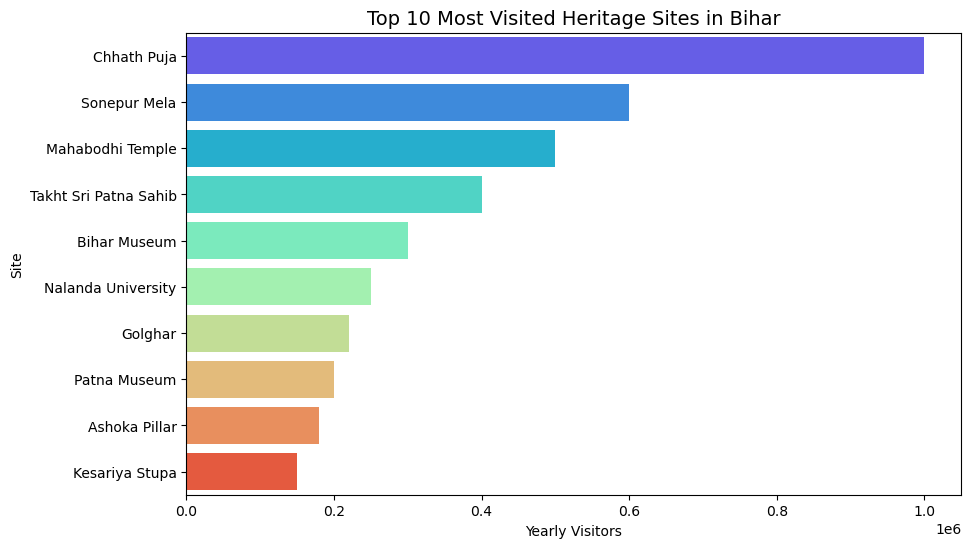

In [12]:
top_sites = df.sort_values(by="Visitors_Yearly", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_sites, x="Visitors_Yearly", y="Site", hue="Site", palette="rainbow")
plt.title("Top 10 Most Visited Heritage Sites in Bihar", fontsize=14)
plt.xlabel("Yearly Visitors")
plt.ylabel("Site")
plt.show()


### Distribution heritage sites

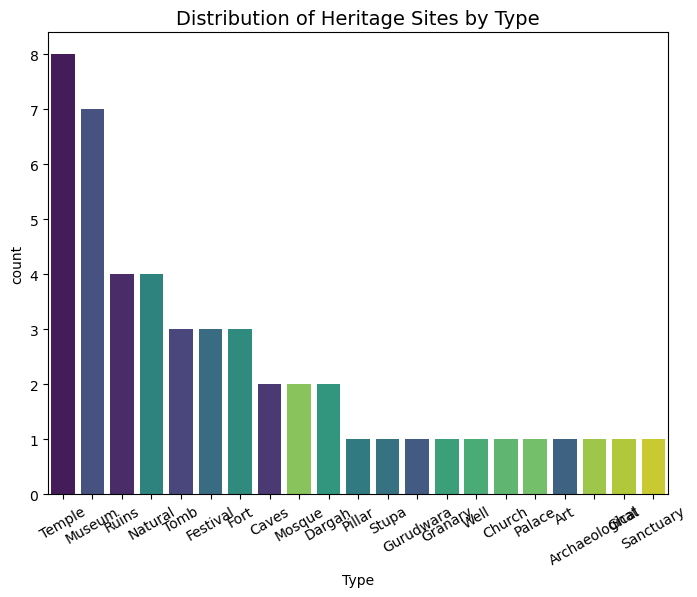

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Type", hue="Type", palette="viridis", order=df['Type'].value_counts().index)
plt.title("Distribution of Heritage Sites by Type", fontsize=14)
plt.xticks(rotation=30)
plt.show()

### district wise 

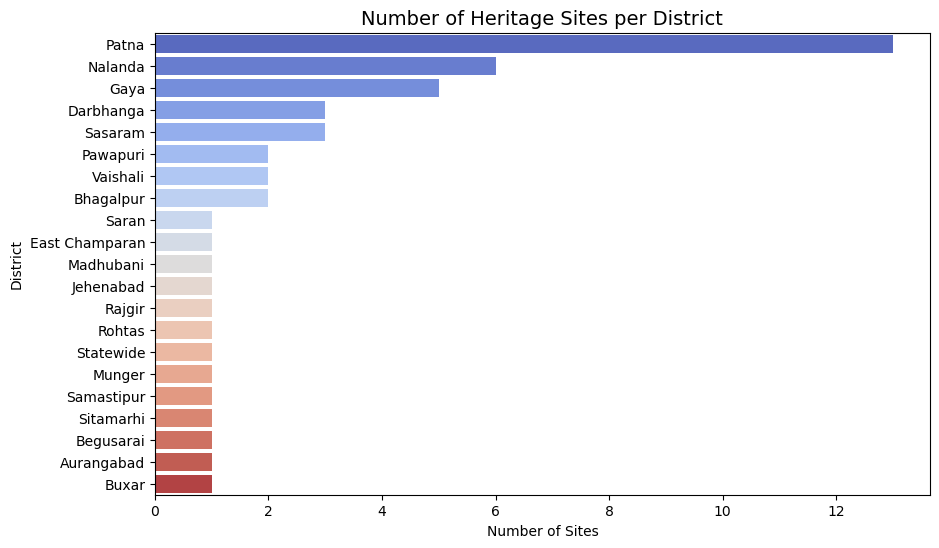

In [20]:
district_count = df['District'].value_counts().reset_index()
district_count.columns = ['District', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=district_count, x="Count", y="District", hue="District", palette="coolwarm")
plt.title("Number of Heritage Sites per District", fontsize=14)
plt.xlabel("Number of Sites")
plt.ylabel("District")
plt.show()

### UNESCO VS NON-UNESCO

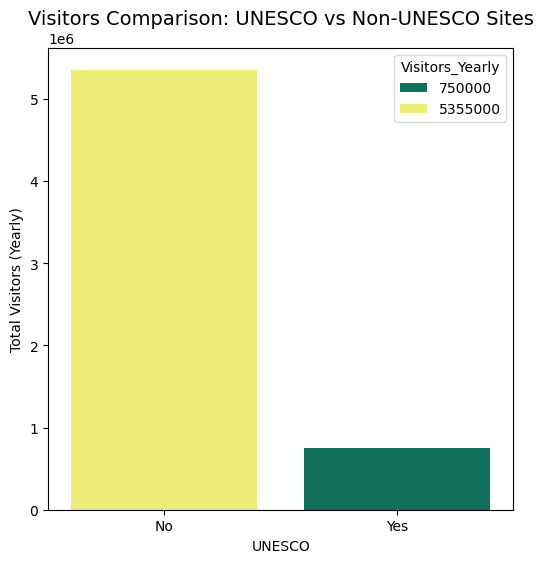

In [27]:
unesco_visitors = df.groupby("UNESCO")["Visitors_Yearly"].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=unesco_visitors, x="UNESCO", y="Visitors_Yearly", hue="Visitors_Yearly", palette="summer")
plt.title("Visitors Comparison: UNESCO vs Non-UNESCO Sites", fontsize=14)
plt.ylabel("Total Visitors (Yearly)")
plt.show()


### timeline of heritage

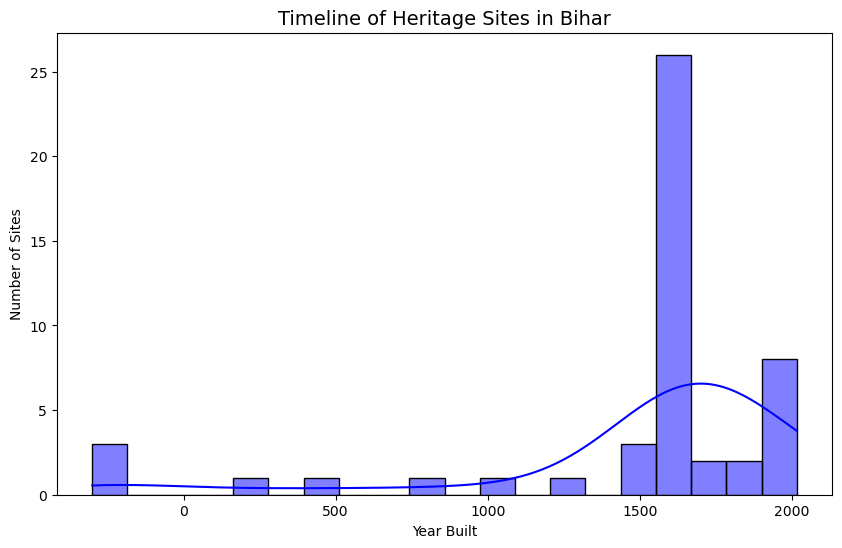

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df['Year_Built'], bins=20, kde=True, color="blue")
plt.title("Timeline of Heritage Sites in Bihar", fontsize=14)
plt.xlabel("Year Built")
plt.ylabel("Number of Sites")
plt.show()


### correlation

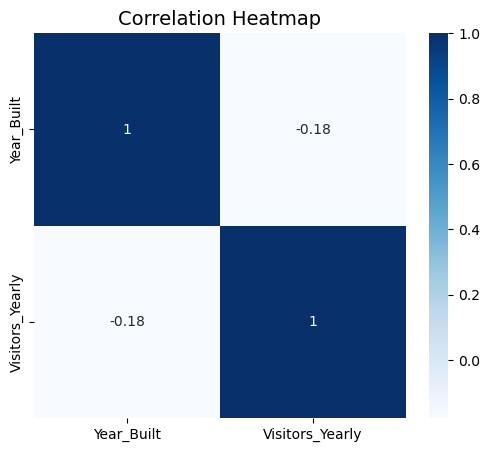

In [43]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


### visitors by type

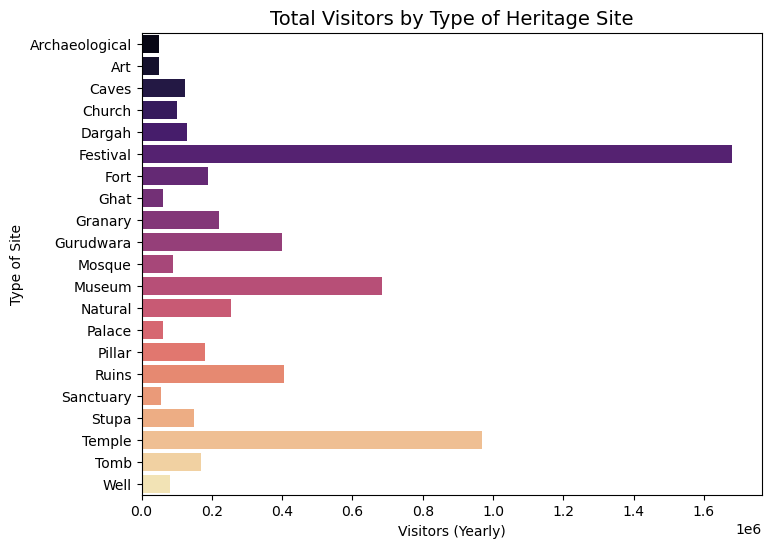

In [48]:
type_visitors = df.groupby("Type")["Visitors_Yearly"].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=type_visitors, x="Visitors_Yearly", y="Type", hue="Type", palette="magma")
plt.title("Total Visitors by Type of Heritage Site", fontsize=14)
plt.xlabel("Visitors (Yearly)")
plt.ylabel("Type of Site")
plt.show()
